# Solving for Gravity Potential using 2D FFT

We are given 

In [69]:
import numpy as np
import matplotlib.pyplot as plt


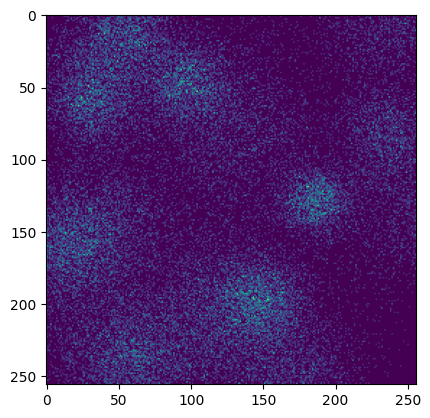

In [70]:
def sample_galaxy(rate = 256, n_galaxies = 20, n_particles_per_galaxy=2000, seed=0):
    np.random.seed(seed)
    grid = np.zeros((rate, rate))

    n_galaxies = 20
    n_particles_per_galaxy = 2000

    particles = np.zeros((n_particles_per_galaxy * n_galaxies, 2))
    for i in range(n_galaxies):
        galaxy = np.random.normal(0, np.random.rand()*0.1+0.05, (n_particles_per_galaxy,2))
        galaxy += np.random.rand(2)- 0.5
        galaxy *= rate
        galaxy += rate/2
        particles[i*n_particles_per_galaxy : (i+1) * n_particles_per_galaxy] = galaxy
        

    for particle in particles:
        x = int(particle[0])
        y = int(particle[1])
        if x < 0 or x >= rate or y < 0 or y >= rate:
            continue
        grid[x, y] += 1

    return grid

plt.imshow(sample_galaxy())



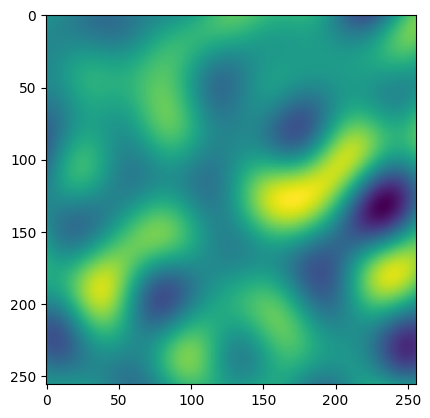

In [71]:


def sample_patterns(rate=256, seed=0, n_patterns=20):
    np.random.seed(seed)

    indices = np.meshgrid(np.arange(0, 1, 1/rate), np.arange(0, 1, 1/rate))
    grid = np.zeros((rate, rate))

    for i in range(n_patterns):
        angle = np.random.rand() * 2 * np.pi
        indices_angled = indices.copy()
        indices_angled[0] = indices[0] * np.cos(angle) - indices[1] * np.sin(angle)
        indices_angled[1] = indices[0] * np.sin(angle) + indices[1] * np.cos(angle)

        indices_angled = np.sum(indices_angled, axis=0)

        grid += np.sin(indices_angled*np.random.rand()*20)

    return grid


plt.imshow(sample_patterns())
    


In [72]:
def fft_1d(signal):
    N = len(signal)
    if N == 1:
        return signal
    else:
        n = np.arange(N)
        X_even = fft_1d(signal[::2])
        X_odd = fft_1d(signal[1::2])
        factor = np.exp(-2j*np.pi*n/ N)
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

def fft_2d(signal):
    n_rows, n_cols = signal.shape

    y = np.zeros((n_rows, n_cols), dtype=np.complex128)
    for row in range(n_rows):
        y[row, :] = fft_1d(signal[row, :])

    y = y.T

    for row in range(n_cols):
        y[row, :] = fft_1d(y[row, :])

    y = y.T

    return y
    
    




TypeError: Image data of dtype complex128 cannot be converted to float

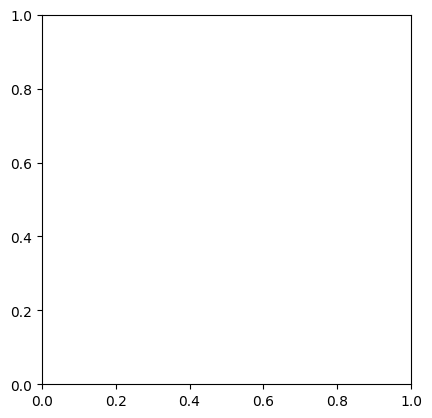

In [74]:
plt.imshow(np.abs(fft_2d(sample_patterns())))